# Exam Seating & Faculty Allocation System using K-Means Clustering

 * Developed an automated exam management system using K-Means Clustering to group 2400+ students by batch and domain across 30
 rooms, ensuring optimal seating plans under room capacity constraints.

 * Implemented faculty allocation logic based on domain expertise, and created a user-friendly interface to manage inputs and generate real
time reports for seating and invigilation assignments.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Data Collection
# Generate sample student data
num_students = 1000
num_batches = 4
num_domains = 5

student_data, _ = make_blobs(n_samples=num_students, centers=num_batches * num_domains, n_features=2, random_state=42)
student_data = pd.DataFrame(student_data, columns=['Batch', 'Domain_Code'])

# Generate sample room capacities
num_rooms = 30
room_capacities = pd.DataFrame({'Room': range(1, num_rooms+1),
                                 'Capacity': np.random.randint(25, 36, size=num_rooms)})


In [2]:

# Data Preprocessing
# No preprocessing required for generated sample data

# K-Means Clustering
# Using KMeans to cluster students based on their domains and batch numbers
k = num_batches * num_domains
kmeans = KMeans(n_clusters=k, random_state=42)
student_data['Cluster'] = kmeans.fit_predict(student_data[['Batch', 'Domain_Code']])

# Seating Plan Generation
# Function to generate a seating plan
def generate_seating_plan(student_data, room_capacities):
    seating_plan = {}

    # Sort students based on cluster
    student_data = student_data.sort_values(by='Cluster')

    for index, room in room_capacities.iterrows():
        # Filter students for the current room's cluster
        students_in_cluster = student_data[student_data['Cluster'] == index]
        # Allocate students to seats in the room
        # For simplicity, randomly assign students to seats in the room
        seats_assigned = np.random.choice(students_in_cluster.index, size=min(len(students_in_cluster), room['Capacity']), replace=False)
        seating_plan[room['Room']] = seats_assigned.tolist()

    return seating_plan

seating_plan = generate_seating_plan(student_data, room_capacities)

# Faculty Allocation
# Assume we have a faculty dataset with their domains of expertise
faculty_data = pd.DataFrame({'Faculty': ['John', 'Emma', 'Alex', 'Lisa', 'Michael'],
                             'Domain': np.random.choice(range(num_domains), size=5)})

def allocate_faculty(student_data, seating_plan, faculty_data):
    faculty_allocation = {}

    for room, students in seating_plan.items():
        # Get unique clusters in the room
        clusters_in_room = student_data.loc[students, 'Cluster'].unique()

        for cluster in clusters_in_room:
            # Find faculty members with expertise in the cluster's domain
            faculty_candidates = faculty_data[faculty_data['Domain'] == cluster]

            if not faculty_candidates.empty:
                # If there are faculty members with expertise, choose one randomly
                faculty_member = faculty_candidates.sample(1, replace=True)['Faculty'].values[0]
            else:
                # If no faculty member with expertise, choose randomly from all faculty
                faculty_member = faculty_data.sample(1, replace=True)['Faculty'].values[0]

            faculty_allocation.setdefault(room, []).append(faculty_member)

    return faculty_allocation

faculty_allocation = allocate_faculty(student_data, seating_plan, faculty_data)



Seating Plan:
Room 1: [936, 387, 269, 175, 56, 260, 263, 735, 615, 202, 863, 822, 367, 454, 40, 867, 521, 91, 819, 431, 970, 812, 674, 114, 374, 610, 869, 118, 404, 483, 709, 4, 547]
Room 2: [171, 39, 371, 534, 914, 518, 898, 283, 200, 292, 729, 681, 150, 218, 339, 981, 90, 847, 11, 344, 384, 895, 335, 442, 220, 787, 649, 878, 237, 34, 130, 555]
Room 3: [113, 492, 545, 502, 742, 82, 713, 152, 430, 54, 784, 872, 656, 205, 686, 156, 607, 398, 682, 724]
Room 4: [595, 402, 278, 663, 328, 106, 685, 336, 58, 836, 738, 696, 43, 482, 782, 316, 894, 716, 569, 933, 975, 303, 688, 41, 837, 665]
Room 5: [267, 917, 221, 683, 18, 172, 927, 504, 84, 470, 714, 182, 740, 772, 778, 767, 151, 397, 189, 320, 706, 204, 190, 965, 169, 992, 140, 972, 814]
Room 6: [13, 678, 285, 382, 375, 922, 370, 844, 753, 551, 108, 242, 453, 833, 574, 307, 797, 676, 245, 232, 794, 980, 136, 312, 946, 754, 250, 121, 419, 273, 378, 884, 246, 830, 257]
Room 7: [391, 745, 650, 598, 944, 563, 211, 522, 758, 493, 77, 613, 2, 687

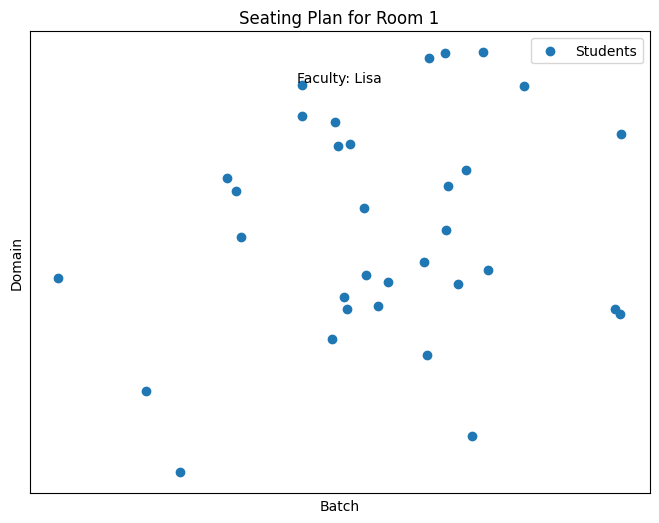

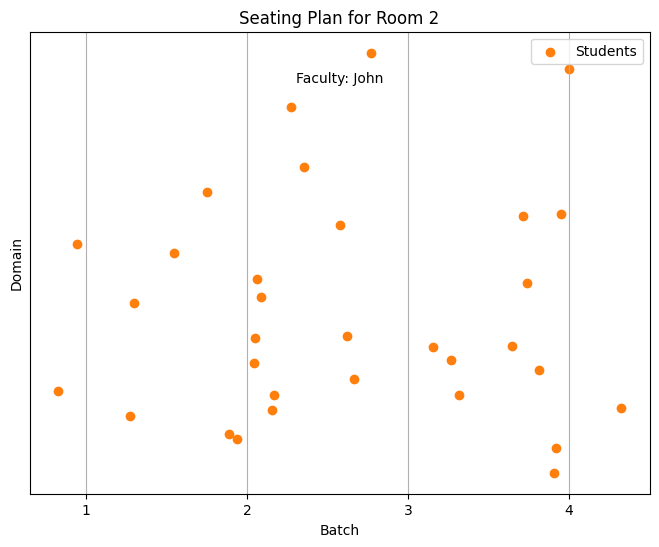

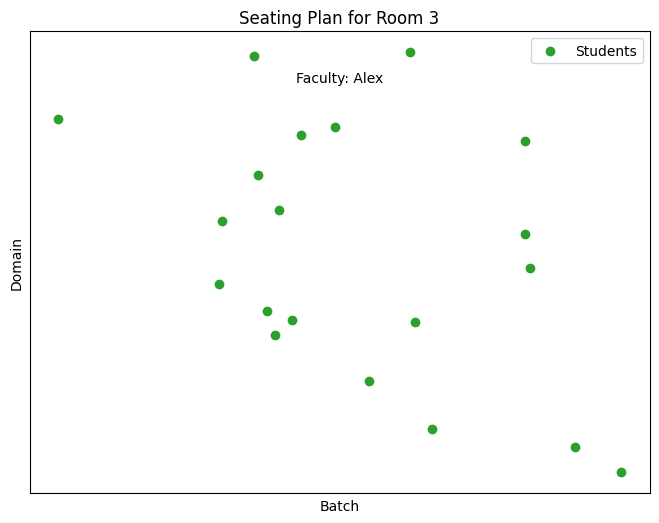

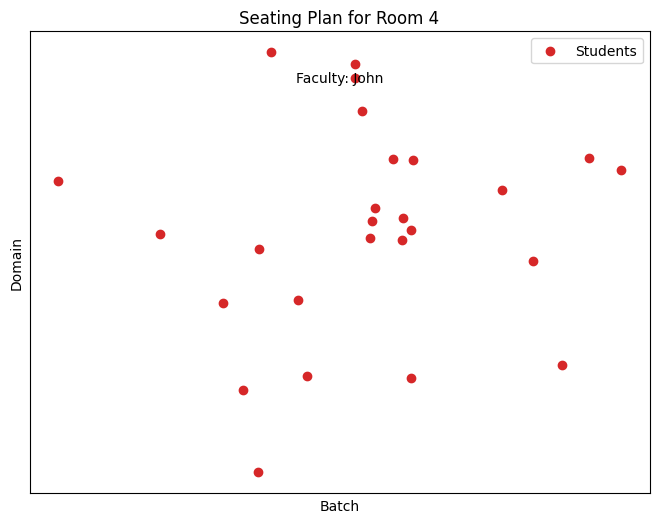

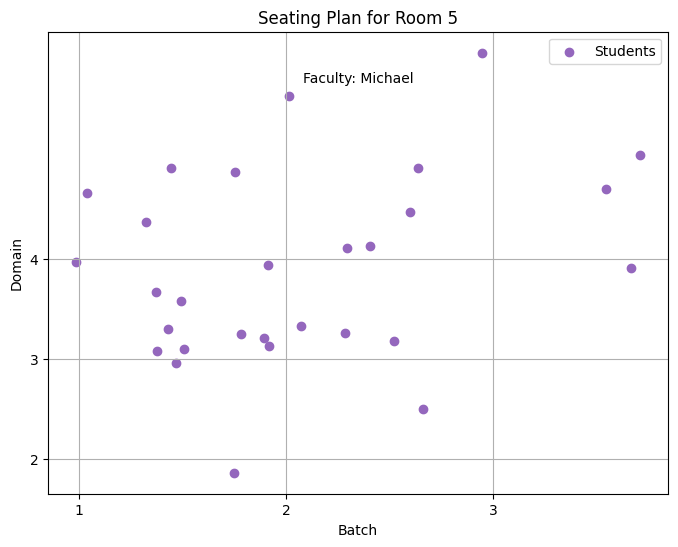

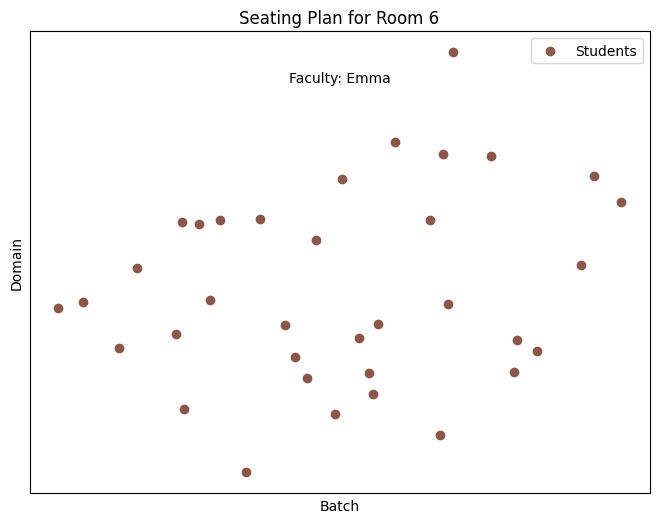

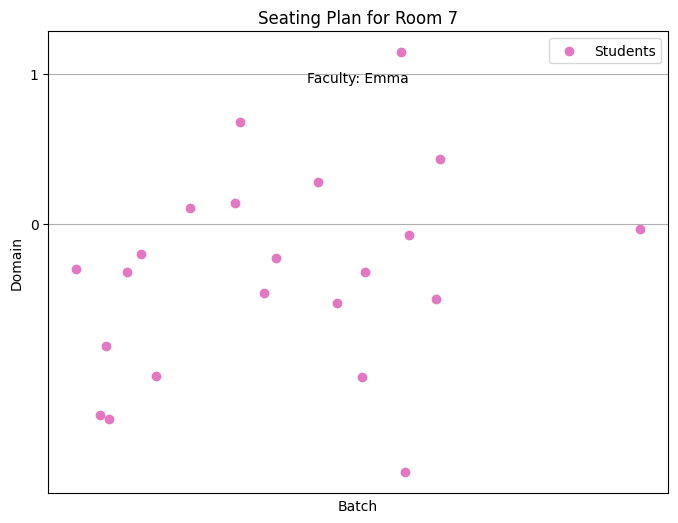

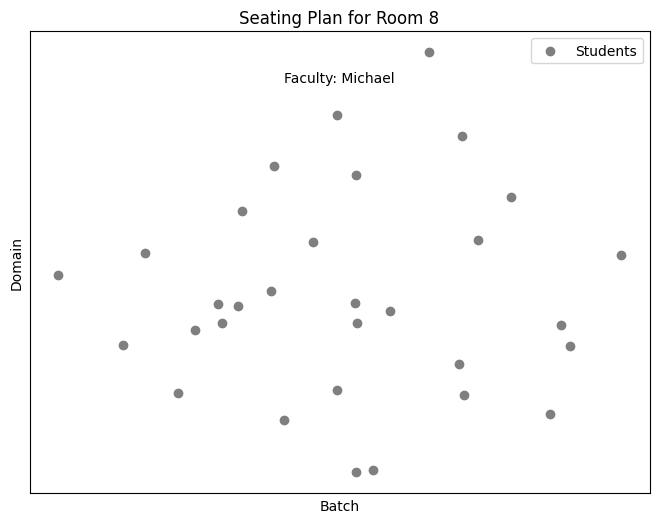

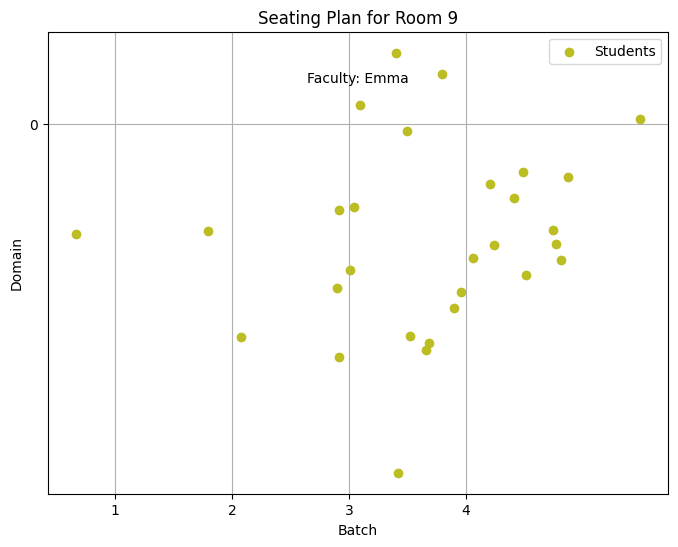

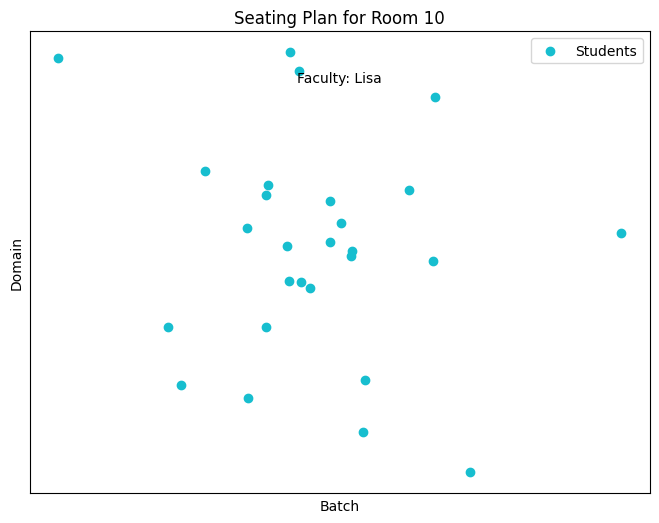

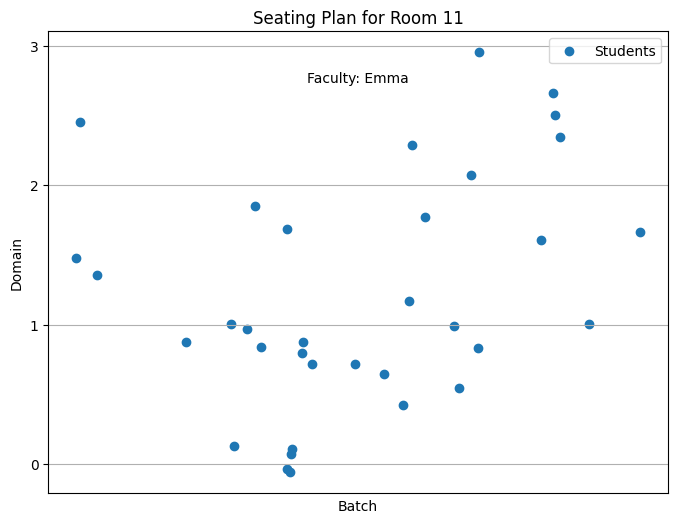

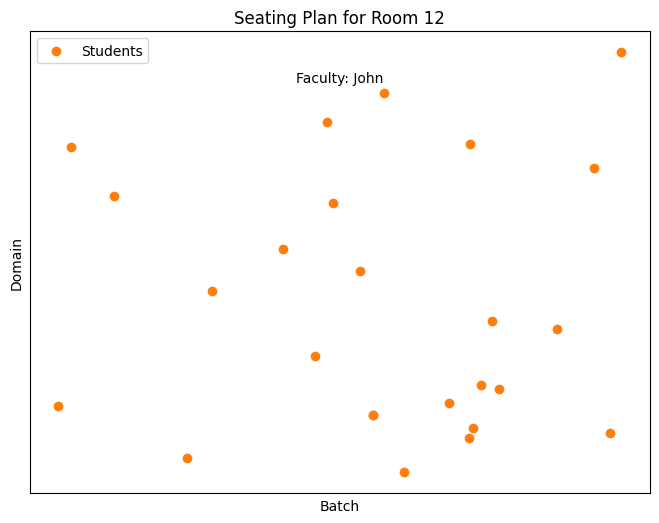

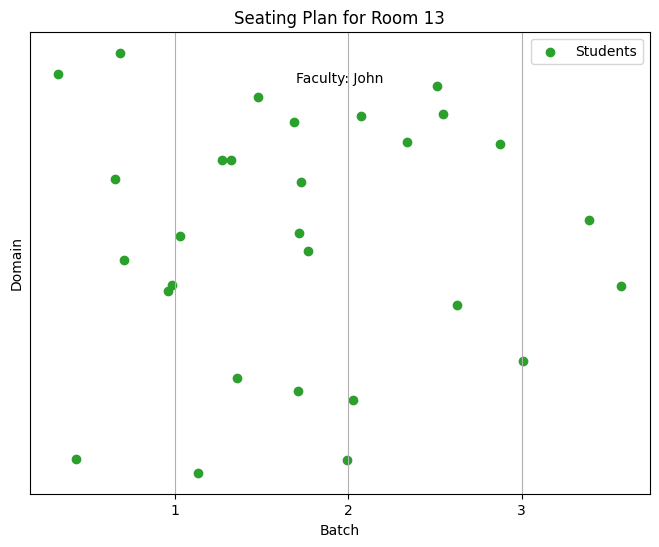

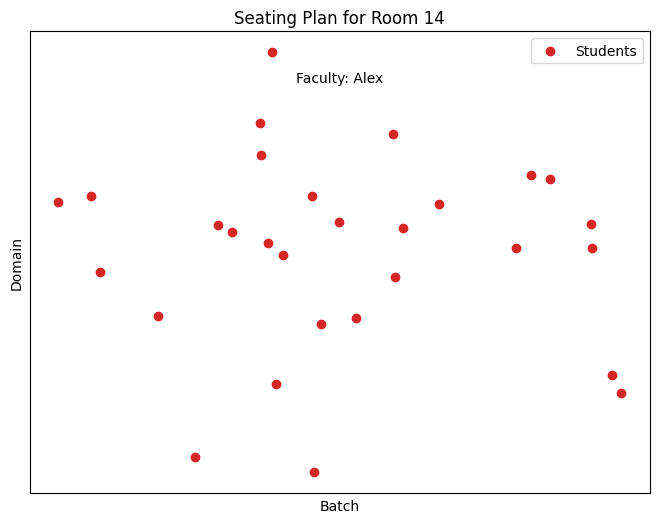

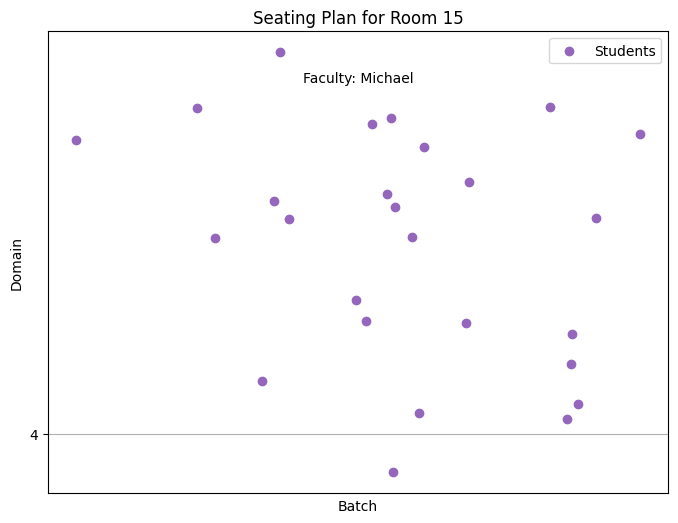

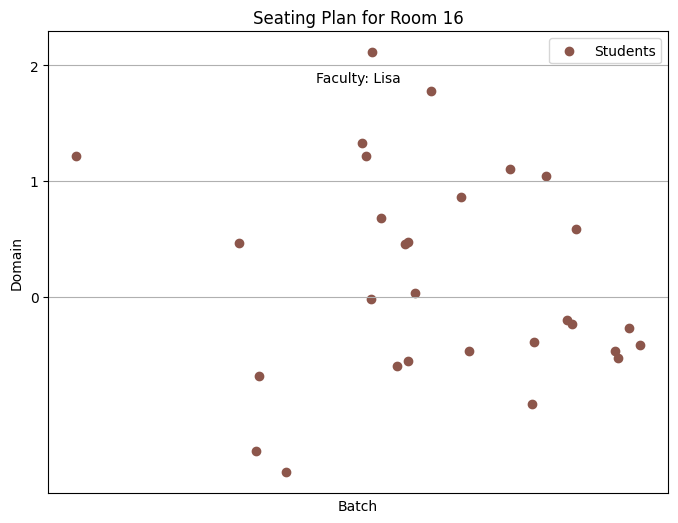

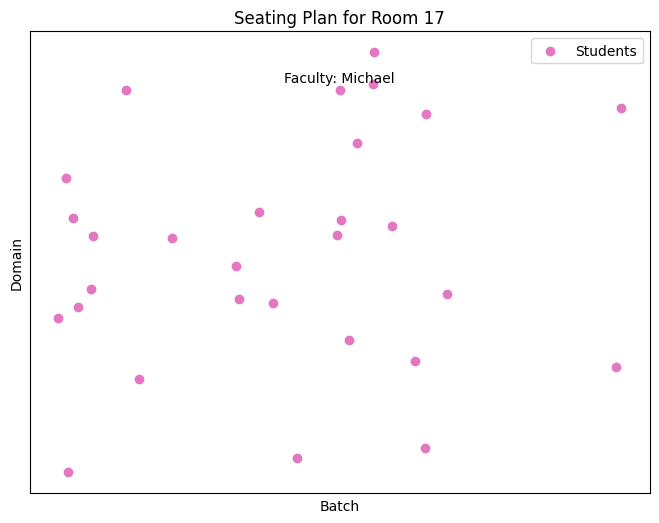

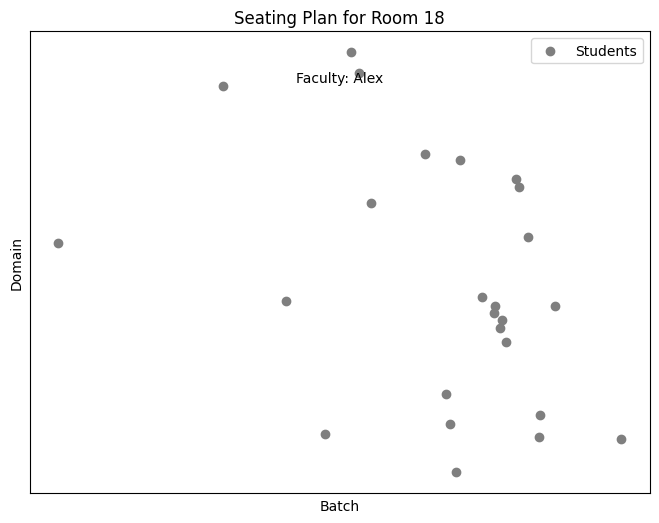

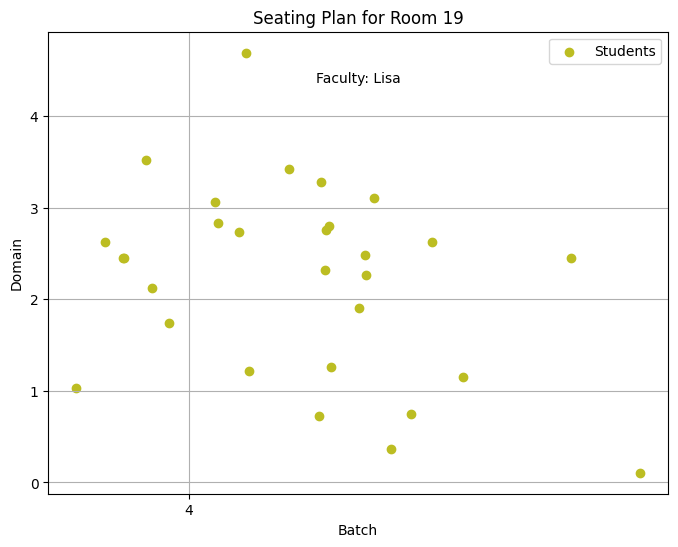

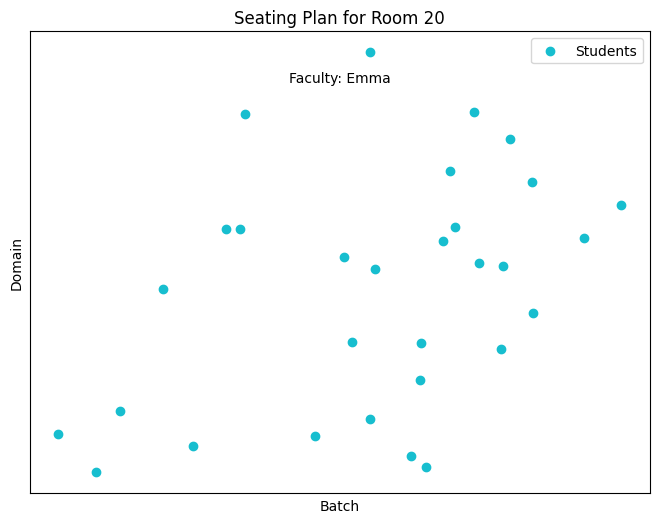

/tmp/ipython-input-3-3672223381.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


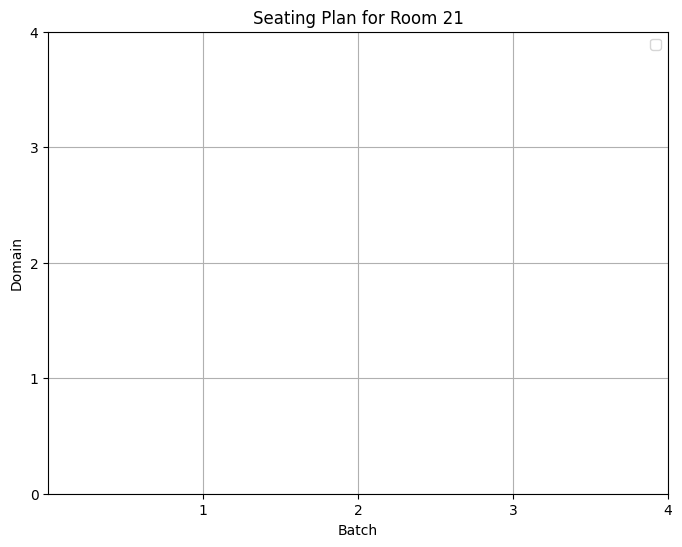

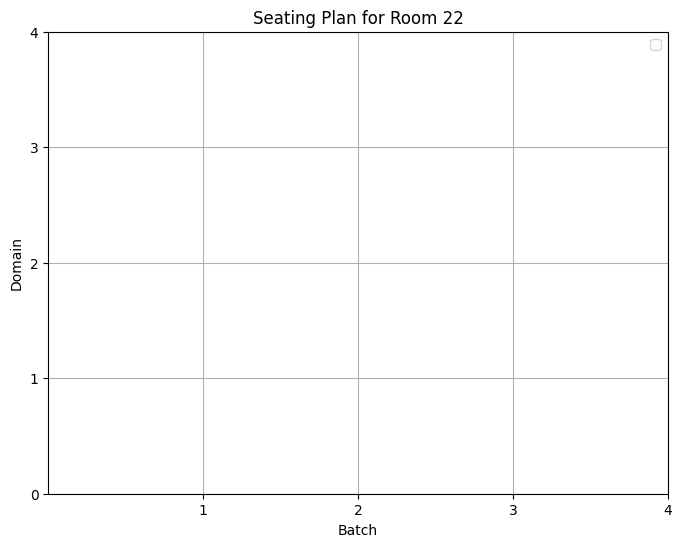

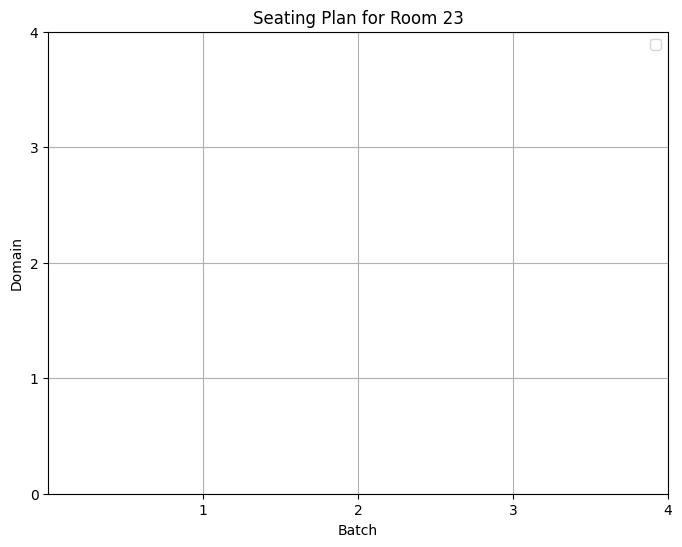

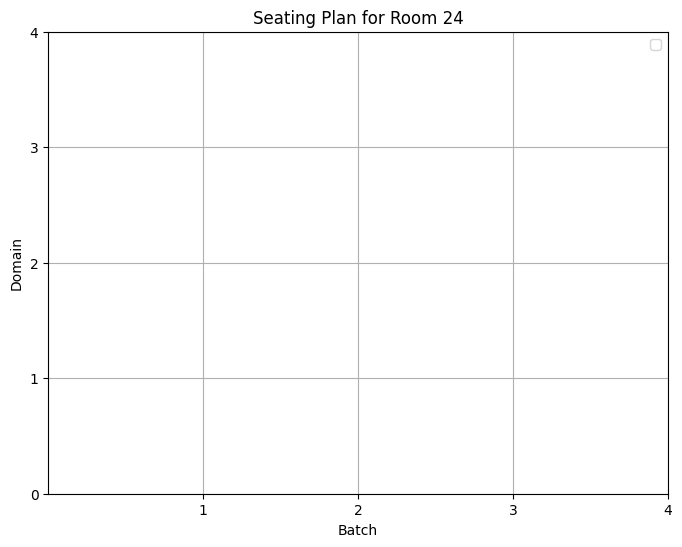

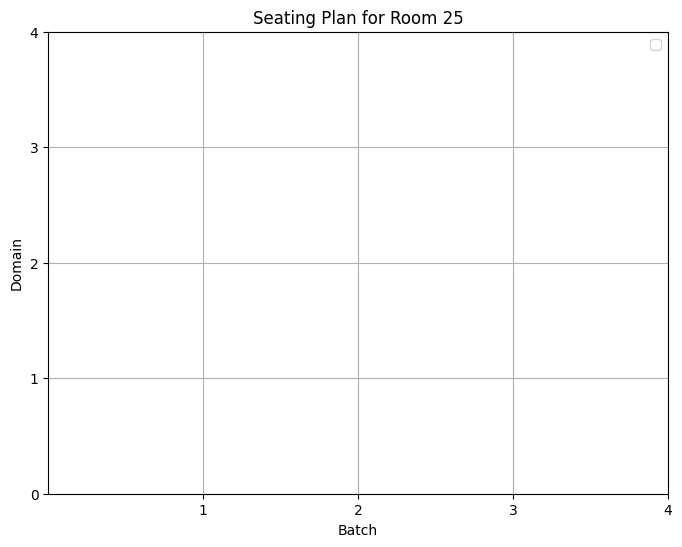

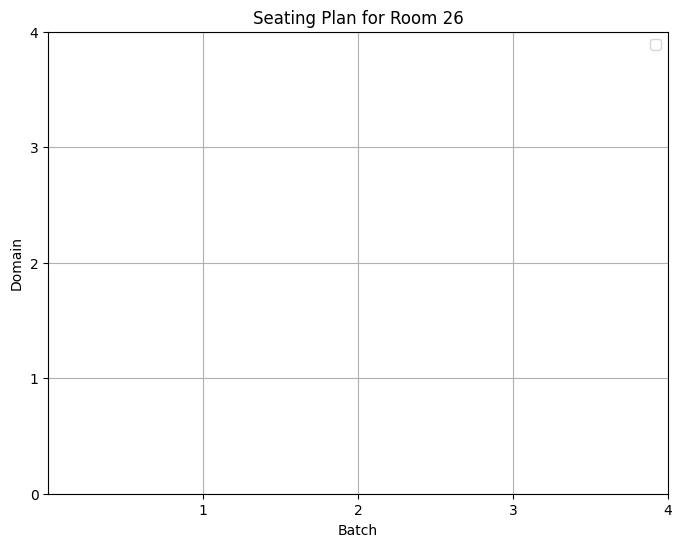

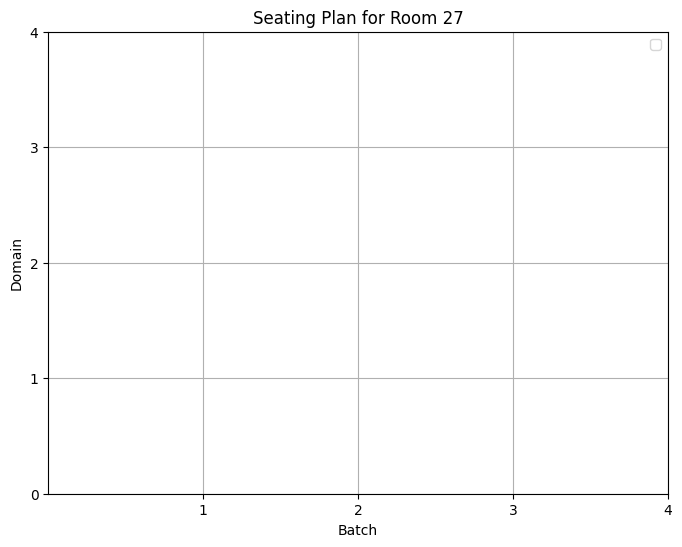

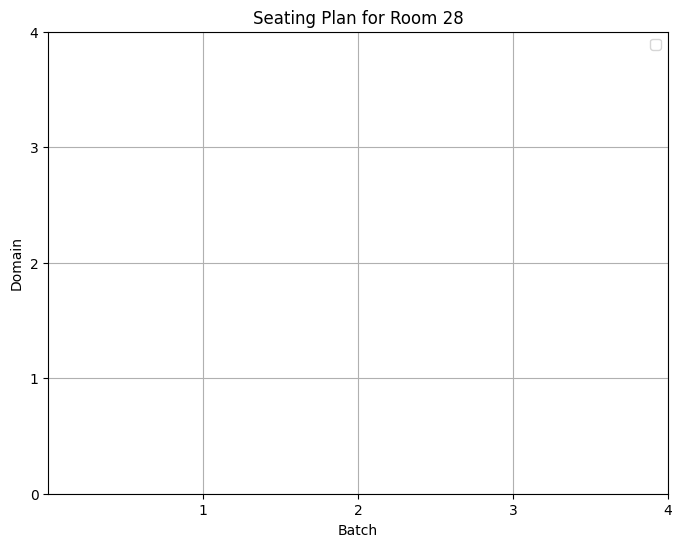

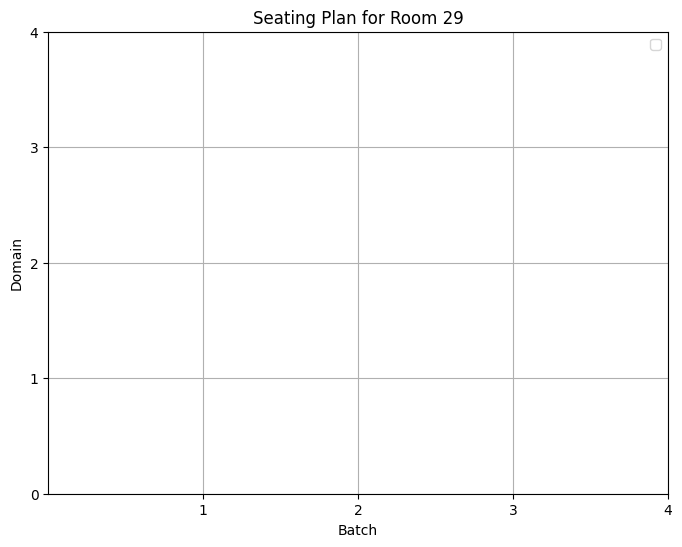

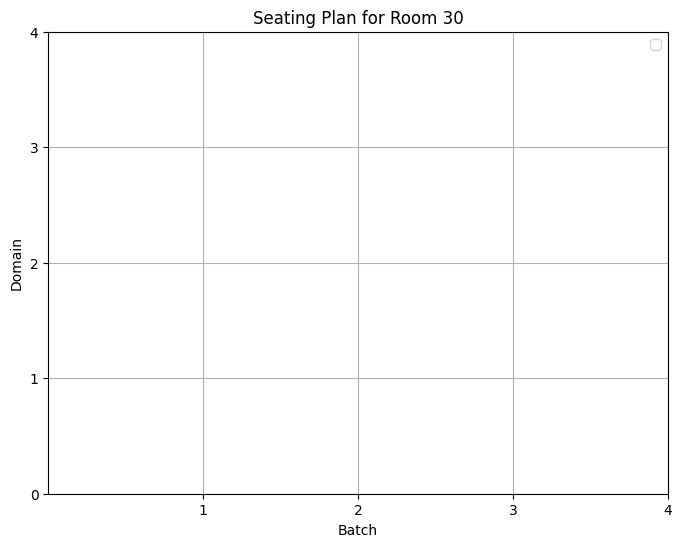

In [3]:
# Reporting
# Generate a report
def generate_report(seating_plan, faculty_allocation):
    print("Seating Plan:")
    for room, students in seating_plan.items():
        print(f"Room {room}: {students}")

    print("\nFaculty Allocation:")
    for room, faculties in faculty_allocation.items():
        print(f"Room {room}: {faculties}")

    # Plotting
    for room, students in seating_plan.items():
        plt.figure(figsize=(8, 6))
        plt.title(f'Seating Plan for Room {room}')
        plt.xlabel('Batch')
        plt.ylabel('Domain')
        plt.xticks(range(1, num_batches + 1))
        plt.yticks(range(num_domains))
        plt.grid(True)

        # Scatter plot for students
        for student in students:
            batch = student_data.loc[student, 'Batch']
            domain = student_data.loc[student, 'Domain_Code']
            plt.scatter(batch, domain, color=f'C{student_data.loc[student, "Cluster"]}', label='Students' if student == students[0] else None)

        # Adding faculty
        if room in faculty_allocation:
            faculty = ', '.join(faculty_allocation[room])
            plt.text(0.5, 0.9, f'Faculty: {faculty}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

        plt.legend()
        plt.show()

generate_report(seating_plan, faculty_allocation)
